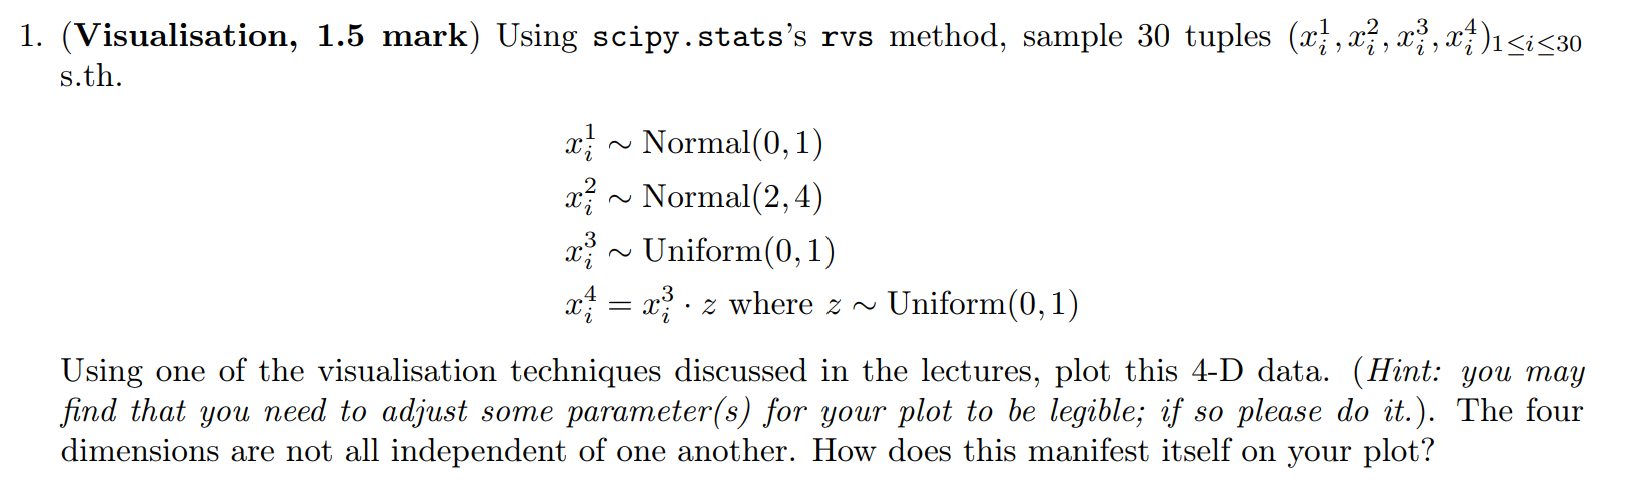

In [36]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [37]:
# loc = mean , scale = std
x_1 = stats.norm.rvs(loc=0, scale=1, size=30)
x_2 = stats.norm.rvs(loc=2, scale=4, size=30)
x_3 = stats.uniform.rvs(loc=0, scale=1, size=30)
z = stats.uniform.rvs(loc=0, scale=1, size=30)
x_4 = np.multiply(x_3, z)

In [38]:
x_4_normalised = list(map(lambda element:(element - min(x_4)) / (max(x_4) - min(x_4)) * 1000 , x_4))
x_3_normalised = list(map(lambda element:(element - min(x_3)) / (max(x_3) - min(x_3)) , x_3))

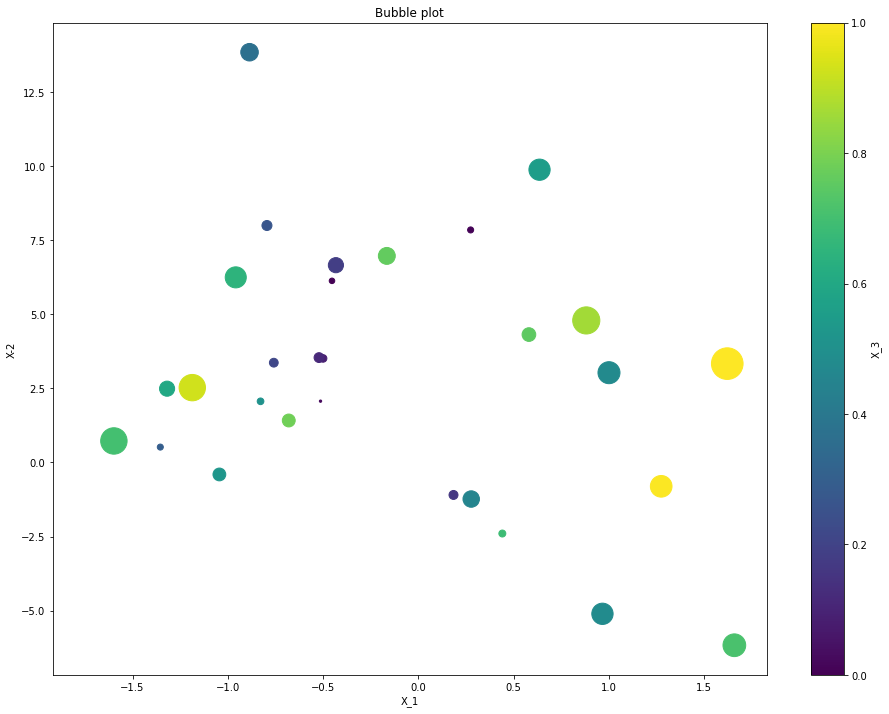

In [40]:
plt.figure(figsize=(16, 12))
plt.scatter(x_1, x_2, c=x_3_normalised, s=x_4_normalised, cmap='viridis')
plt.xlabel('X_1')
plt.ylabel('X-2')
plt.colorbar(label='X_3')
plt.title('Bubble plot')
plt.show()

<font color='green'>
x_3 and x_4 are dependent, since x_4 is calculated as x_3 * z. Also by looking at the bubble plot, this dependency is obvious:
x_3 is bubble color and x_4 is bubble size in the plot, we can see that larger bubbles (larger size) have lighter colors (larger color value (closer to 1)). Similarly, smaller bubbles have darker colors(smaller color value (closer to 0)).

x_1 and x_2 represent the positions of bubbles in the plot. These positions are related to x_1 and x_2 distributions. Bubbles are centered around 0 (mean value in x_1 distribution) in the x_1 axis and around 2 (mean value in the x_2 distribution) in the x_2 axis. This independence between x_1 and x_2 is visualized in the plot.</font>

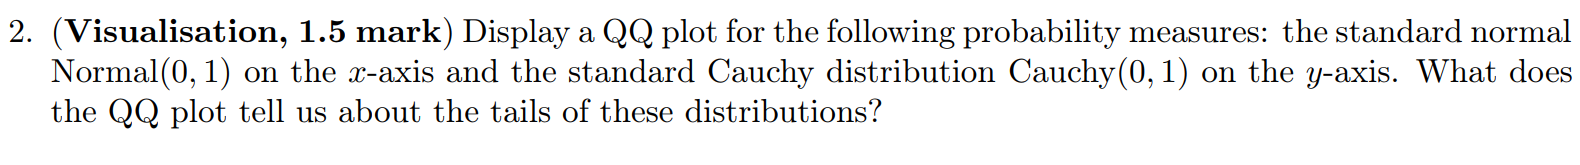

In [62]:
# !pip install statsmodels
# import statsmodels.api as sm

In [63]:
# x = np.random.normal(0, 1, 100)
# y = np.random.standard_cauchy(100)

# sm.qqplot_2samples(np.sort(x), np.sort(y), line='45')

# plt.title('QQ Plot')
# plt.xlabel('Normal(0,1)')
# plt.ylabel('Cauchy(0,1)')
# plt.show()

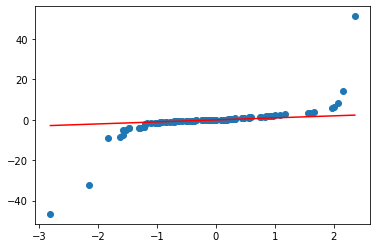

In [64]:
x = np.random.normal(0, 1, 100)
xx = np.random.standard_cauchy(100)
p = np.linspace(0,100,100)
y = np.percentile(x, p)
yy = np.percentile(xx, p)
plt.plot(y, yy, 'o')
plt.plot(y,y, color='red')

<font color='red'>????????????????????????????????</font>

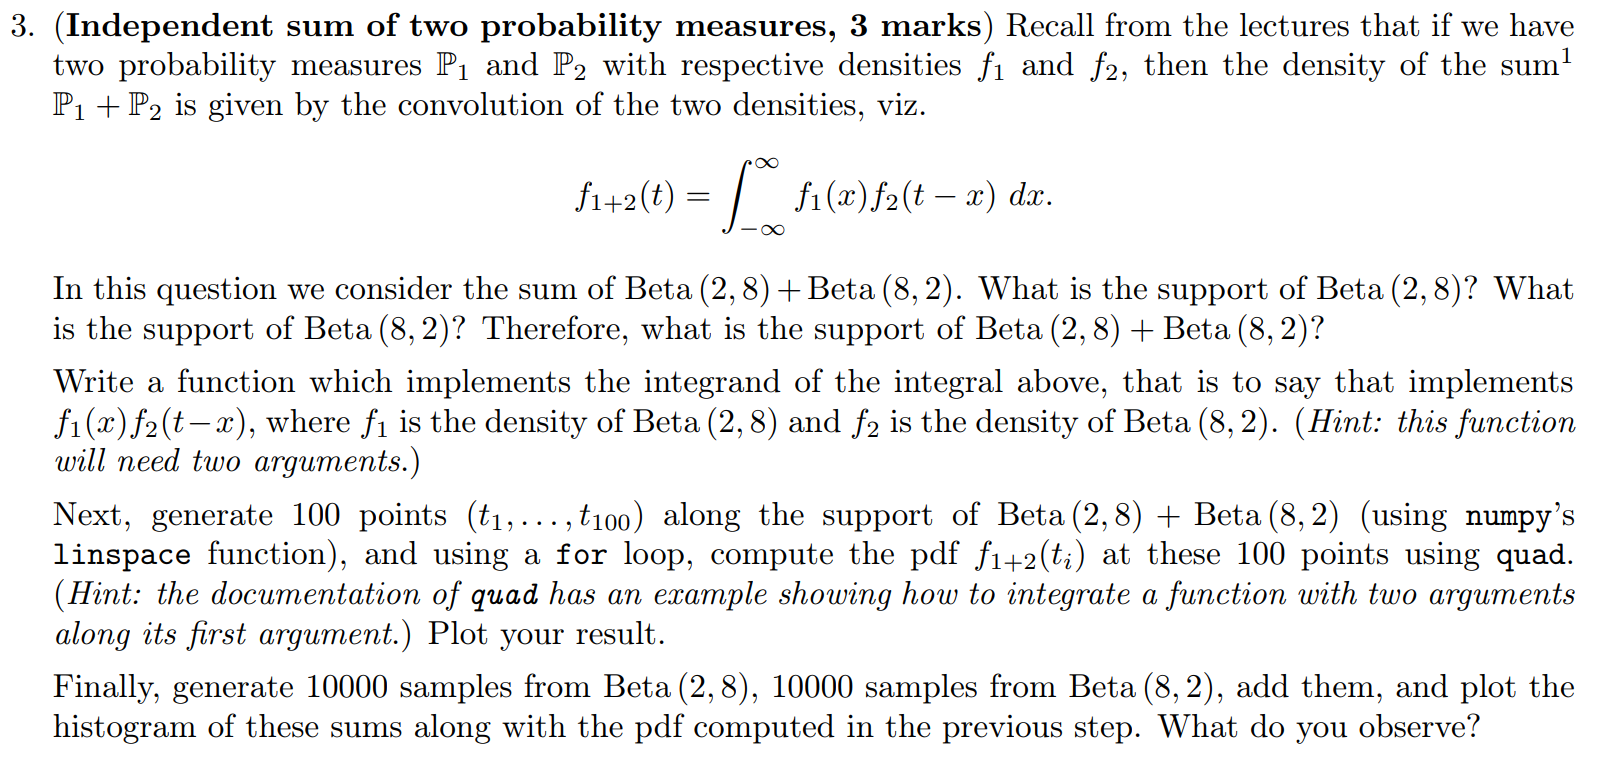

<font color='green'>
The support of the beta distribution is the interval [0, 1], which means that the probability density of this distribution is non-zero in this interval.

Beta(2, 8): the support is [0, 1] means that the pdf of this distribution is zero outside the interval [0, 1].

Beta(8, 2): the support is [0, 1] means that the pdf of this distribution is zero outside interval [0, 1].

Beta(2, 8) + Beta(8, 2): similarly, the support is [0, 1]. Since this distribution is the convolution of the two above distributions, its support is the same as the above distributions. 
</font>

In [ ]:
from scipy.integrate import quad

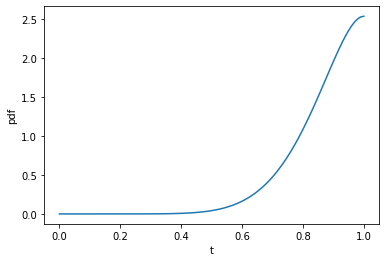

In [68]:
def integrand(x, t):
    return stats.beta.pdf(x, a=2, b=8) * stats.beta.pdf(t - x, a=8, b=2)

t_list = np.linspace(0, 1, 100)
pdf_list = list(map(lambda t: quad(integrand, 0, 1, args=(t,))[0], t_list))

plt.plot(t_list, pdf_list)
plt.xlabel('t')
plt.ylabel('pdf')
plt.show()

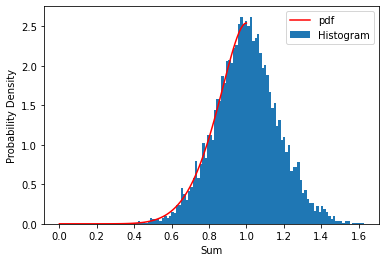

In [75]:
data = np.random.beta(2, 8, 10000) + np.random.beta(8, 2, 10000)
plt.hist(data, bins=int(np.sqrt(len(data))), density=True, label='Histogram')

plt.plot(t_list, pdf_list, color='red', label='pdf')

plt.xlabel('Sum')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


<font color='green'>
The histogram of the sums resembles the PDF we earlier calculated, as adding the two Beta distributions behaves as expected, based on the convolution of their densities.
</font>

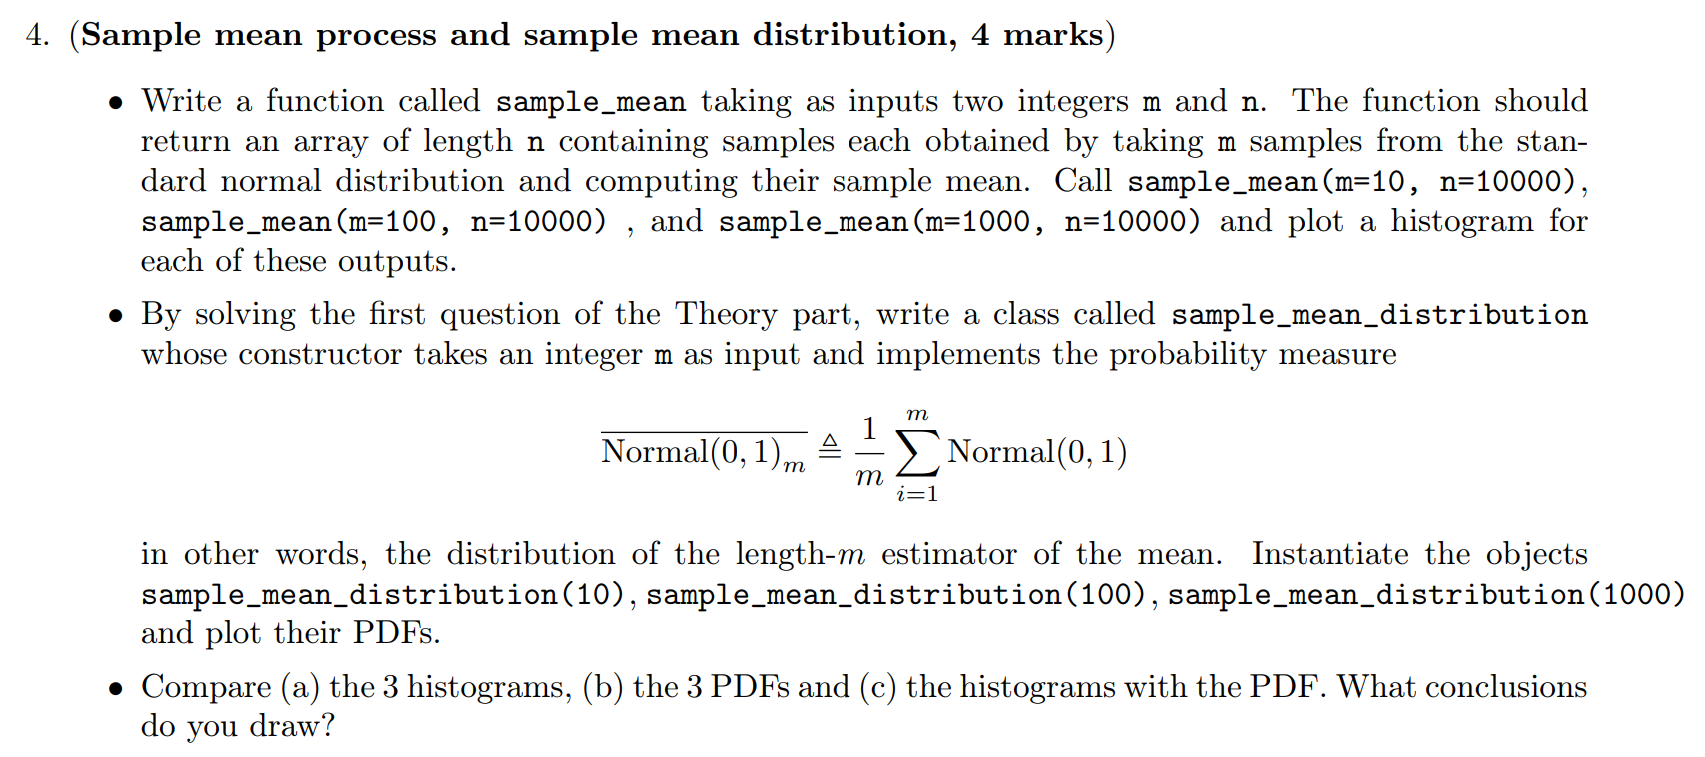

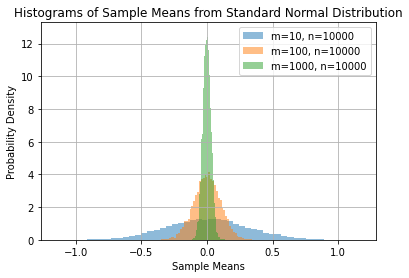

In [45]:
def sample_mean(m, n):
    sample_means = np.mean(np.random.randn(m, n), axis=0)
    return sample_means

# Parameters for different cases
params = [(10, 10000), (100, 10000), (1000, 10000)]

# Plot histograms for each case
for m, n in params:
    sample_means = sample_mean(m, n)
    
    plt.hist(sample_means, bins=50, density=True, alpha=0.5, label=f'm={m}, n={n}')

plt.xlabel('Sample Means')
plt.ylabel('Probability Density')
plt.title('Histograms of Sample Means from Standard Normal Distribution')
plt.legend()
plt.grid(True)
plt.show()


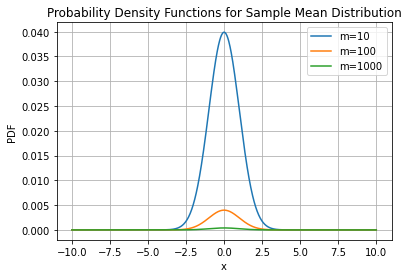

In [46]:
# import numpy as np
# import matplotlib.pyplot as plt

class sample_mean_distribution:
    def __init__(self, m):
        self.m = m

    def pdf(self, x):
        if x < -10 or x > 10:
            return 0  # Values outside this range are practically zero

        # Calculate the PDF of Normal(0, 1)^m
        pdf_val = 1 / self.m * np.prod(np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi))
        return pdf_val

# Instantiate the objects and plot their PDFs
m_values = [10, 100, 1000]
x = np.linspace(-10, 10, 1000)

for m in m_values:
    dist = sample_mean_distribution(m)
    pdf_values = [dist.pdf(val) for val in x]

    plt.plot(x, pdf_values, label=f'm={m}')

plt.title("Probability Density Functions for Sample Mean Distribution")
plt.xlabel("x")
plt.ylabel("PDF")
plt.legend()
plt.grid()
plt.show()


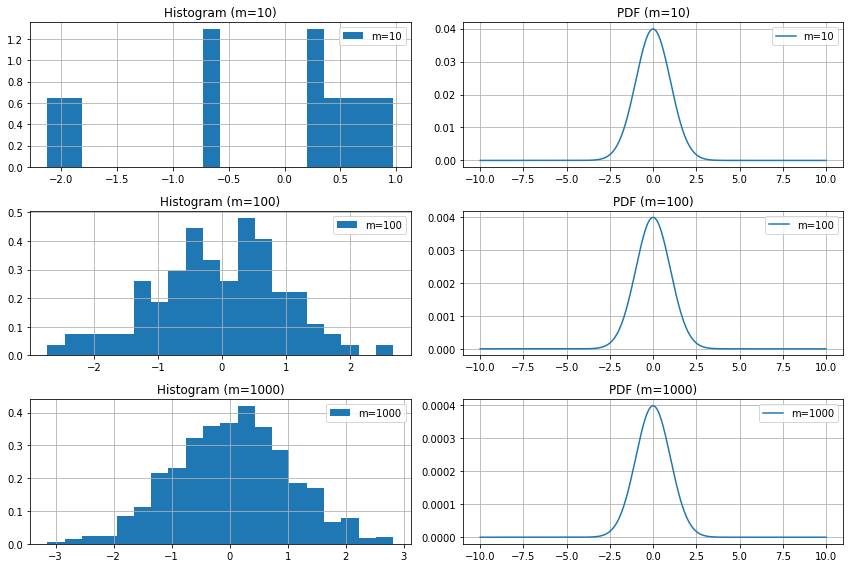

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

class sample_mean_distribution:
    def __init__(self, m):
        self.m = m

    def pdf(self, x):
        if x < -10 or x > 10:
            return 0  # Values outside this range are practically zero

        # Calculate the PDF of Normal(0, 1)^m
        pdf_val = 1 / self.m * np.prod(np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi))
        return pdf_val

# Instantiate the objects and plot their PDFs and histograms
m_values = [10, 100, 1000]
x = np.linspace(-10, 10, 1000)

plt.figure(figsize=(12, 8))

for i, m in enumerate(m_values):
    dist = sample_mean_distribution(m)
    pdf_values = [dist.pdf(val) for val in x]

    plt.subplot(3, 2, 2 * i + 1)
    plt.hist(np.random.normal(0, 1, m), bins=20, density=True, label=f'm={m}')
    plt.title(f'Histogram (m={m})')
    plt.grid()
    plt.legend()

    plt.subplot(3, 2, 2 * i + 2)
    plt.plot(x, pdf_values, label=f'm={m}')
    plt.title(f'PDF (m={m})')
    plt.grid()
    plt.legend()

plt.tight_layout()
plt.show()


Conclusions:

Check if the histograms become more bell-shaped and resemble a normal distribution as m increases. This demonstrates the Central Limit Theorem, where the sample mean approaches a normal distribution with larger sample sizes.
Observe if the PDFs are consistent with the histograms. The PDFs should match the shape and spread of the histograms.
Consider how increasing m affects the distribution, especially how it narrows the spread.
